In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

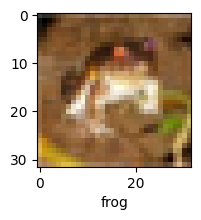

In [10]:
plot_sample(X_train, y_train, 0)

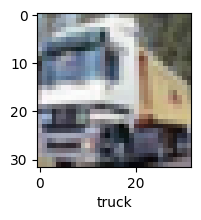

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8127 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6269 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5432 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4807 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4300 - accuracy: 0.4946


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      1000
           1       0.65      0.57      0.60      1000
           2       0.42      0.26      0.33      1000
           3       0.29      0.47      0.36      1000
           4       0.48      0.35      0.41      1000
           5       0.37      0.42      0.39      1000
           6       0.51      0.56      0.53      1000
           7       0.60      0.49      0.54      1000
           8       0.65      0.59      0.62      1000
           9       0.52      0.64      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
history = model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Define EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4705 - accuracy: 0.4726 - val_loss: 1.2251 - val_accuracy: 0.5641
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1294 - accuracy: 0.6050 - val_loss: 1.0344 - val_accuracy: 0.6402
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0018 - accuracy: 0.6517 - val_loss: 1.0225 - val_accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9208 - accuracy: 0.6807 - val_loss: 1.0010 - val_accuracy: 0.6575
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8545 - accuracy: 0.7030 - val_loss: 0.9199 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7971 - accuracy: 0.7217 - val_loss: 0.9665 - val_accuracy: 0.6723
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7515 - accuracy: 0.7389 - val_loss: 0.9119 - val_accuracy

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9117 - accuracy: 0.7032


[0.9117255806922913, 0.7031999826431274]

In [20]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.58087712e-05, 2.23286770e-06, 1.05113373e-03, 8.69412124e-01,
        4.66148462e-03, 1.09984674e-01, 4.32289811e-03, 2.71074750e-05,
        1.05085662e-02, 3.94622703e-06],
       [5.02656098e-04, 1.45958751e-01, 1.46674975e-05, 7.64296146e-08,
        3.43890804e-07, 5.67789815e-10, 7.33137062e-09, 6.12073109e-07,
        8.52165461e-01, 1.35736039e-03],
       [1.91529244e-01, 8.28091130e-02, 2.11260729e-02, 5.53086028e-03,
        8.22593924e-04, 3.99822777e-04, 6.84772618e-04, 7.26192142e-04,
        6.76520586e-01, 1.98507290e-02],
       [7.06769884e-01, 1.65305957e-01, 5.59805240e-03, 6.80316426e-03,
        3.84340849e-04, 4.37971001e-04, 1.77394343e-03, 1.80648658e-05,
        1.12775646e-01, 1.33047521e-04],
       [4.51772575e-09, 3.85106745e-07, 1.78648951e-03, 1.55333448e-02,
        9.29204285e-01, 1.45686223e-04, 5.33261560e-02, 3.41615731e-07,
        3.39000758e-06, 5.83585447e-09]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

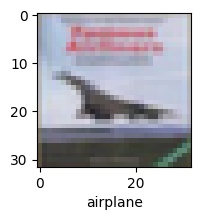

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
classes[y_classes[3]]

'airplane'

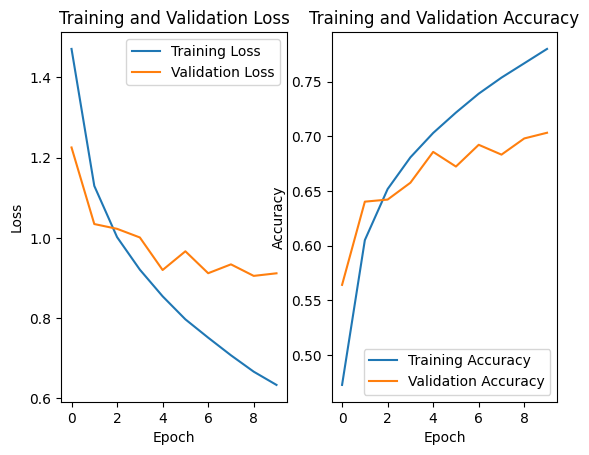

In [26]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()